In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

In [66]:
import pathlib
data_dir='Dataset'
data=pathlib.Path(data_dir)

In [67]:
image_count = len(list(data.glob('*/*.jpg')))
print(image_count)

1998


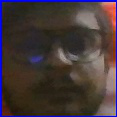

In [68]:
rishav = list(data.glob('rishav/*'))
PIL.Image.open(str(rishav[0]))

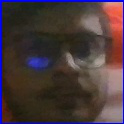

In [69]:
PIL.Image.open(str(rishav[34]))

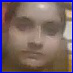

In [70]:
simran = list(data.glob('simran/*'))
PIL.Image.open(str(simran[0]))

In [71]:
class_name=['rishav','simran']

In [72]:
import cv2

In [73]:
dataset=[]
for i in rishav:
    img_data = cv2.imread(str(i))
    img1 = cv2.resize(img_data,(50,50))
    dataset.append([np.array(img1),0])
for i in simran:
    img_data = cv2.imread(str(i))
    img1 = cv2.resize(img_data,(50,50))
    dataset.append([np.array(img1),1])

In [74]:
from random import shuffle
shuffle(dataset)

In [75]:
len(dataset)

1998

In [76]:
train=dataset[:1990]
test=dataset[1990:]

In [77]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch)
  break

(50, 50, 3)
1


In [78]:
X_train = np.array([i[0] for i in train])
y_train = np.array([i[1] for i in train])

In [79]:
print(X_train.shape)

(1990, 50, 50, 3)


In [80]:
X_test = np.array([i[0] for i in test])
print(X_test.shape)
y_test = np.array([i[1] for i in test])

(8, 50, 50, 3)


In [81]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [82]:
model=Sequential([
  #,input_shape=(50,50,3)
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(50,50,3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

In [83]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)         

In [85]:

model.fit(X_train, y_train, epochs=12)

Epoch 1/12
63/63 [==============================] - 5s 66ms/step - loss: 0.1340 - accuracy: 0.9447
Epoch 2/12
63/63 [==============================] - 4s 64ms/step - loss: 0.0072 - accuracy: 0.9985
Epoch 3/12
63/63 [==============================] - 4s 65ms/step - loss: 0.0032 - accuracy: 0.9995
Epoch 4/12
63/63 [==============================] - 4s 66ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 5/12
63/63 [==============================] - 4s 65ms/step - loss: 3.8767e-04 - accuracy: 1.0000
Epoch 6/12
63/63 [==============================] - 4s 66ms/step - loss: 1.6068e-04 - accuracy: 1.0000
Epoch 7/12
63/63 [==============================] - 4s 65ms/step - loss: 8.3813e-05 - accuracy: 1.0000
Epoch 8/12
63/63 [==============================] - 4s 65ms/step - loss: 6.4984e-05 - accuracy: 1.0000
Epoch 9/12
63/63 [==============================] - 4s 63ms/step - loss: 5.0821e-05 - accuracy: 1.0000
Epoch 10/12
63/63 [==============================] - 4s 65ms/step - loss: 4.1115e-05 - ac

In [87]:
predictions = model.predict(X_test)
score = tf.nn.softmax(predictions[6])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_name[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to simran with a 100.00 percent confidence.


In [88]:
len(X_test)

8

In [90]:
score=(tf.nn.softmax(predictions))

In [91]:
y_classes=[np.argmax(i)for i in score]
y_classes

[0, 0, 1, 1, 1, 0, 1, 0]

In [92]:
def plot_sample(X, y, index):
    plt.figure(figsize = (20,4))
    plt.imshow(X[index])
    plt.xlabel(class_name[y[index]])

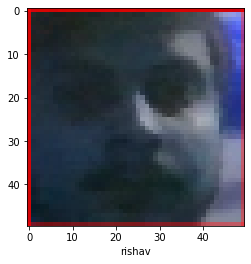

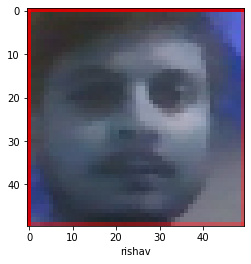

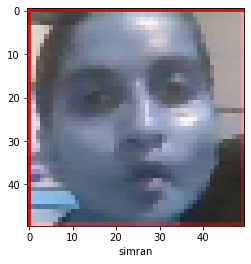

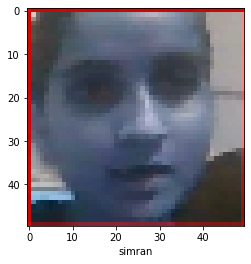

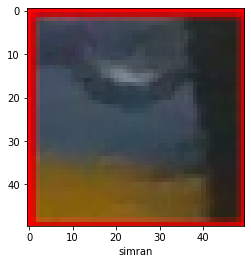

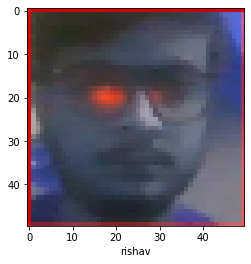

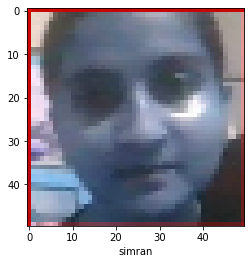

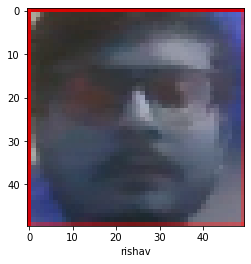

In [93]:
for i in range(len(X_test)):
    plot_sample(X_test,y_classes,i)

In [94]:
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath)

In [96]:
cam = cv2.VideoCapture(0)
cam.set(4, 4800) # set video widht
cam.set(4, 480) # set video height
font = cv2.FONT_HERSHEY_SIMPLEX
count=1
while True:
    ret, img =cam.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale( 
        gray,
        scaleFactor = 1.2,
        minNeighbors = 5,
        minSize = (50,50),
       )
    for(x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        count+=1
        test=img[y:y+h,x:x+w]
        img1 = cv2.resize(test,(50,50))
        test1=[]
        test1.append(np.array(img1))
        x_test=np.array([i for i in test1])
        prediction= model.predict(x_test)
        score = tf.nn.softmax(prediction)
        confidence=np.max(score)*100
        name=class_name[np.argmax(score)]
        if confidence<0:
            name='Unknown'
        cv2.putText(
                    img, 
                    str(name), 
                    (x+5,y-5), 
                    font, 
                    1, 
                    (255,255,255), 
                    2
                   )
        cv2.putText(
                    img, 
                    str(confidence), 
                    (x+5,y+h-5), 
                    font, 
                    1, 
                    (255,255,0), 
                    1
                   )
        
        
    cv2.imshow('camera',img) 
    k = cv2.waitKey(10) & 0xff # Press 'ESC' for exiting video
    if k == 27:
        break
# Do a bit of cleanup
print("\n [INFO] Exiting Program and cleanup stuff")
cam.release()
cv2.destroyAllWindows()
        
        
        


 [INFO] Exiting Program and cleanup stuff
